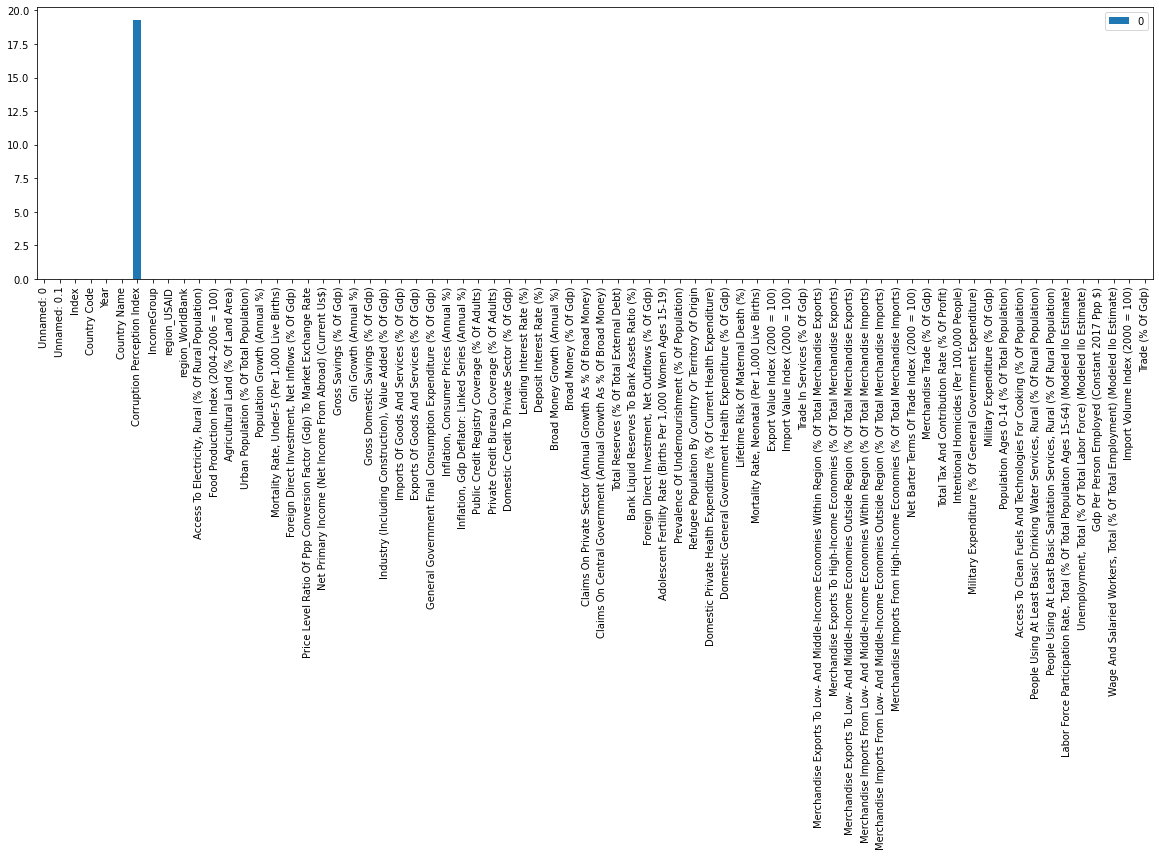

In [29]:
import pandas as pd

df = pd.read_csv('/Users/yanglingxi/Documents/GitHub/Anti-Corruption2/final.csv')
pd.DataFrame(df.isna().sum()*100/df.shape[0]).plot.bar(figsize=(20,5))
df = df.dropna()

In [30]:
## Researving this column for the end
df_RWB = df['region_WorldBank']

# dropping unnecessary columns
df.drop(['Unnamed: 0', 'Unnamed: 0.1','region_WorldBank','Country Code','Country Name','Year'],axis=1,inplace=True)
df.dropna()

,Index,Corruption Perception Index,IncomeGroup,region_USAID,"Access To Electricity, Rural (% Of Rural Population)",Food Production Index (2004-2006 = 100),Agricultural Land (% Of Land Area),Urban Population (% Of Total Population),Population Growth (Annual %),"Mortality Rate, Under-5 (Per 1,000 Live Births)",...,Population Ages 0-14 (% Of Total Population),Access To Clean Fuels And Technologies For Cooking (% Of Population),"People Using At Least Basic Drinking Water Services, Rural (% Of Rural Population)","People Using At Least Basic Sanitation Services, Rural (% Of Rural Population)","Labor Force Participation Rate, Total (% Of Total Population Ages 15-64) (Modeled Ilo Estimate)","Unemployment, Total (% Of Total Labor Force) (Modeled Ilo Estimate)",Gdp Per Person Employed (Constant 2017 Ppp $),"Wage And Salaried Workers, Total (% Of Total Employment) (Modeled Ilo Estimate)",Import Volume Index (2000 = 100),Trade (% Of Gdp)
56,196,18.0,Low income,South and Central Asia (SCA),19.868266,108.92000,58.067580,23.113,2.493842,99.5,...,48.126233,15.99000,33.732741,27.476086,49.344002,11.046,7056.174167,8.852000,187.697479,55.393618
57,197,18.0,Low income,South and Central Asia (SCA),19.868266,108.92000,58.067580,23.113,2.493842,99.5,...,48.126233,15.99000,33.732741,27.476086,49.344002,11.046,7056.174167,8.852000,187.697479,55.393618
58,198,18.0,Low income,South and Central Asia (SCA),19.868266,108.92000,58.067580,23.113,2.493842,99.5,...,48.126233,15.99000,33.732741,27.476086,49.344002,11.046,7056.174167,8.852000,187.697479,55.393618
59,199,18.0,Low income,South and Central Asia (SCA),19.868266,108.92000,58.067580,23.113,2.493842,99.5,...,48.126233,15.99000,33.732741,27.476086,49.344002,11.046,7056.174167,8.852000,187.697479,55.393618
60,200,18.0,Low income,South and Central Asia (SCA),19.868266,108.92000,58.067580,23.113,2.493842,99.5,...,48.126233,15.99000,33.732741,27.476086,49.344002,11.046,7056.174167,8.852000,187.697479,55.393618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,5359,37.0,Lower middle income,Sub-Saharan Africa (SSA),13.997699,171.55394,32.476466,42.976,2.951583,64.3,...,45.411369,16.75112,41.952058,18.932012,75.505997,11.626,9648.782217,21.349001,567.892902,71.585759
4020,5360,35.0,Lower middle income,Sub-Saharan Africa (SSA),10.968000,156.42136,33.127447,43.521,2.912801,63.3,...,44.936141,16.58418,44.134510,18.919180,75.313004,11.500,9676.891123,21.507000,626.417589,72.966216
4021,5361,35.0,Lower middle income,Sub-Saharan Africa (SSA),10.968000,156.42136,33.127447,43.521,2.912801,63.3,...,44.936141,16.58418,44.134510,18.919180,75.313004,11.500,9676.891123,21.507000,626.417589,72.966216
4022,5362,34.0,Lower middle income,Sub-Saharan Africa (SSA),13.775150,153.82510,34.782422,44.072,2.892373,61.7,...,44.462509,17.74318,45.556623,18.179606,75.259003,11.425,9479.540064,21.563000,344.359603,70.035035


In [31]:
#### PRE PROCESSING ###

In [32]:
from sklearn import preprocessing
# label_encoder object knows how to understand word labels, we will only do it for columns where we see a level, it is in order  
label_encoder = preprocessing.LabelEncoder()
df['IncomeGroup']= label_encoder.fit_transform(df['IncomeGroup'])

In [33]:
#Categorical Columns

object_type = df.select_dtypes(include=['object']).columns.to_list()
print(object_type)

['region_USAID']


In [34]:
## Seperating the data. 

y = df[['Corruption Perception Index']]
X = df.drop(['Corruption Perception Index','Index'],axis=1, inplace = True)

#one hot encoding the coulmns 
X = pd.get_dummies(df)


# SCALING THE DATA
#we will see if this helps in the end
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [35]:
#drop region world bank when doing modelling and don't use index
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [36]:
#Model Fitting

from xgboost import XGBClassifier

# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)

/Users/yanglingxi/opt/anaconda3/envs/py37/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


XGBClassifier(objective='multi:softprob')

In [37]:
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error

print(mean_absolute_error(y_test, predictions))
print(r2_score(y_test, predictions))
print(mean_squared_error(y_test, predictions))






0.3953846153846154
0.9300815979014002
6.333846153846154


In [38]:
import matplotlib.pyplot as plt
%matplotlib inline 

NameError: name 'pyplot' is not defined

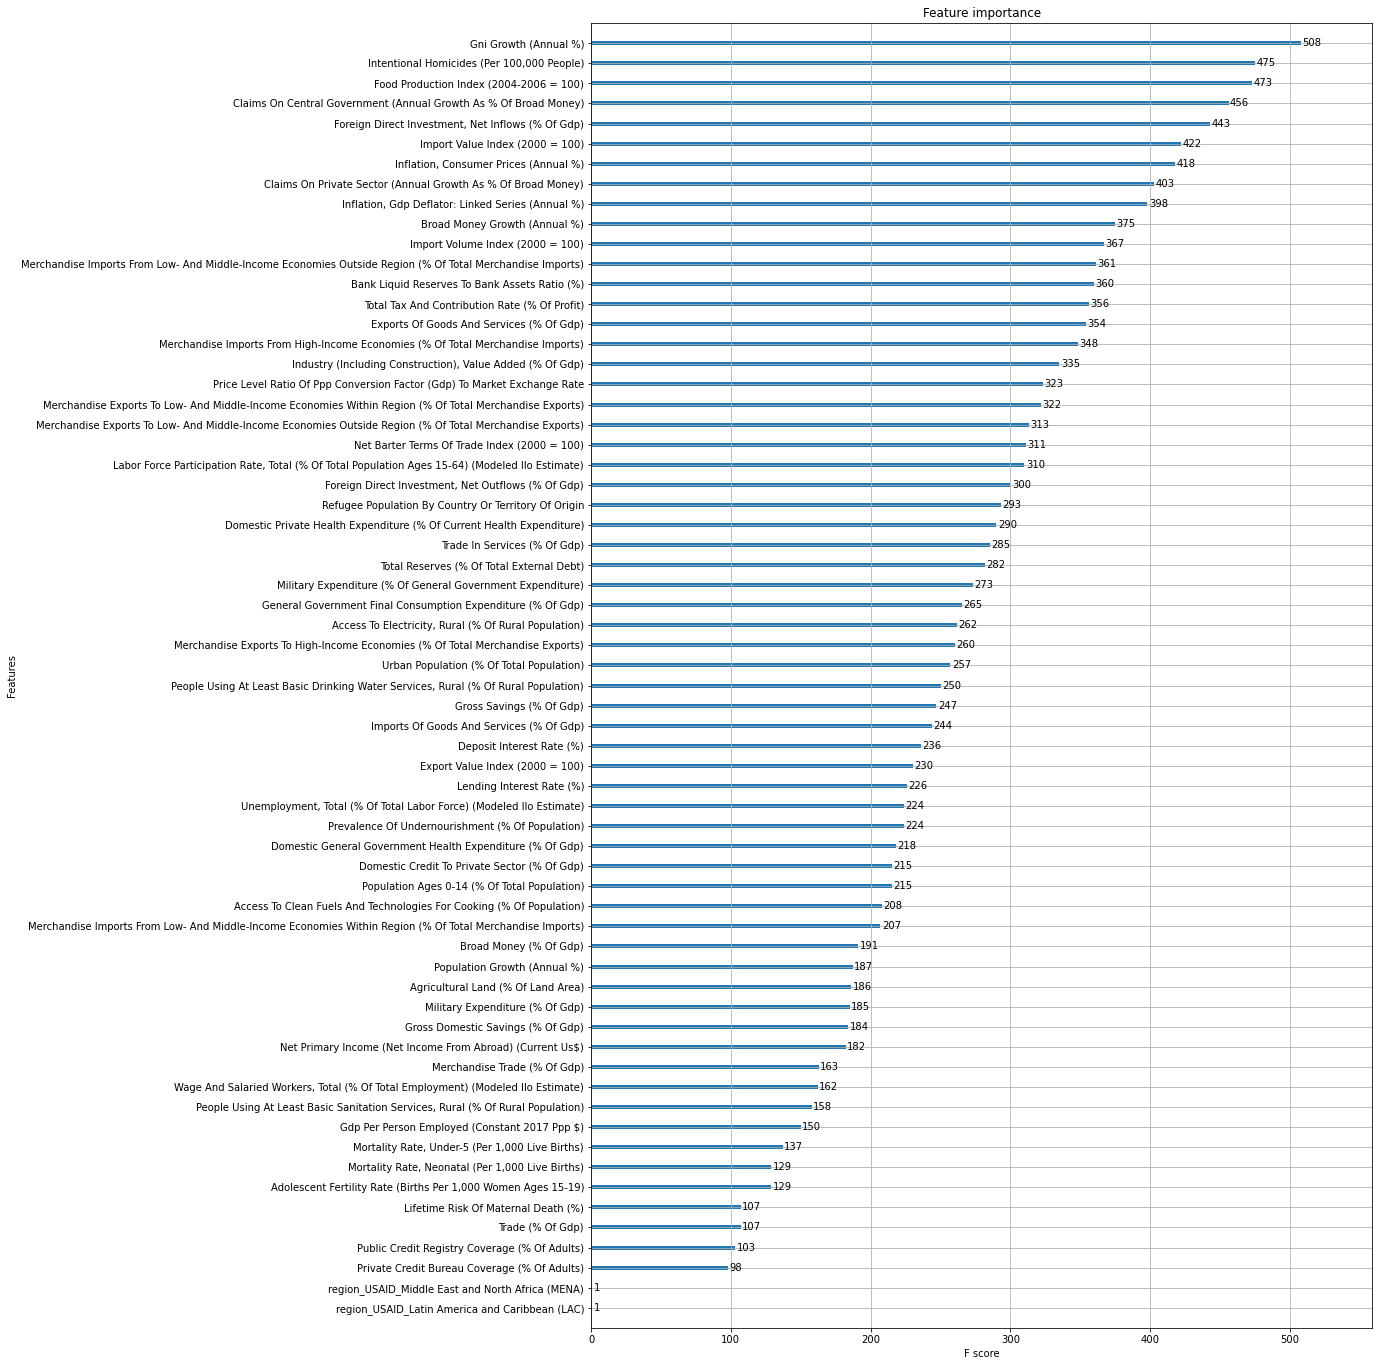

In [39]:
# plot feature importance
from xgboost import plot_importance
plt.rcParams["figure.figsize"] = (14, 24)
plot_importance(model)
pyplot.show()

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

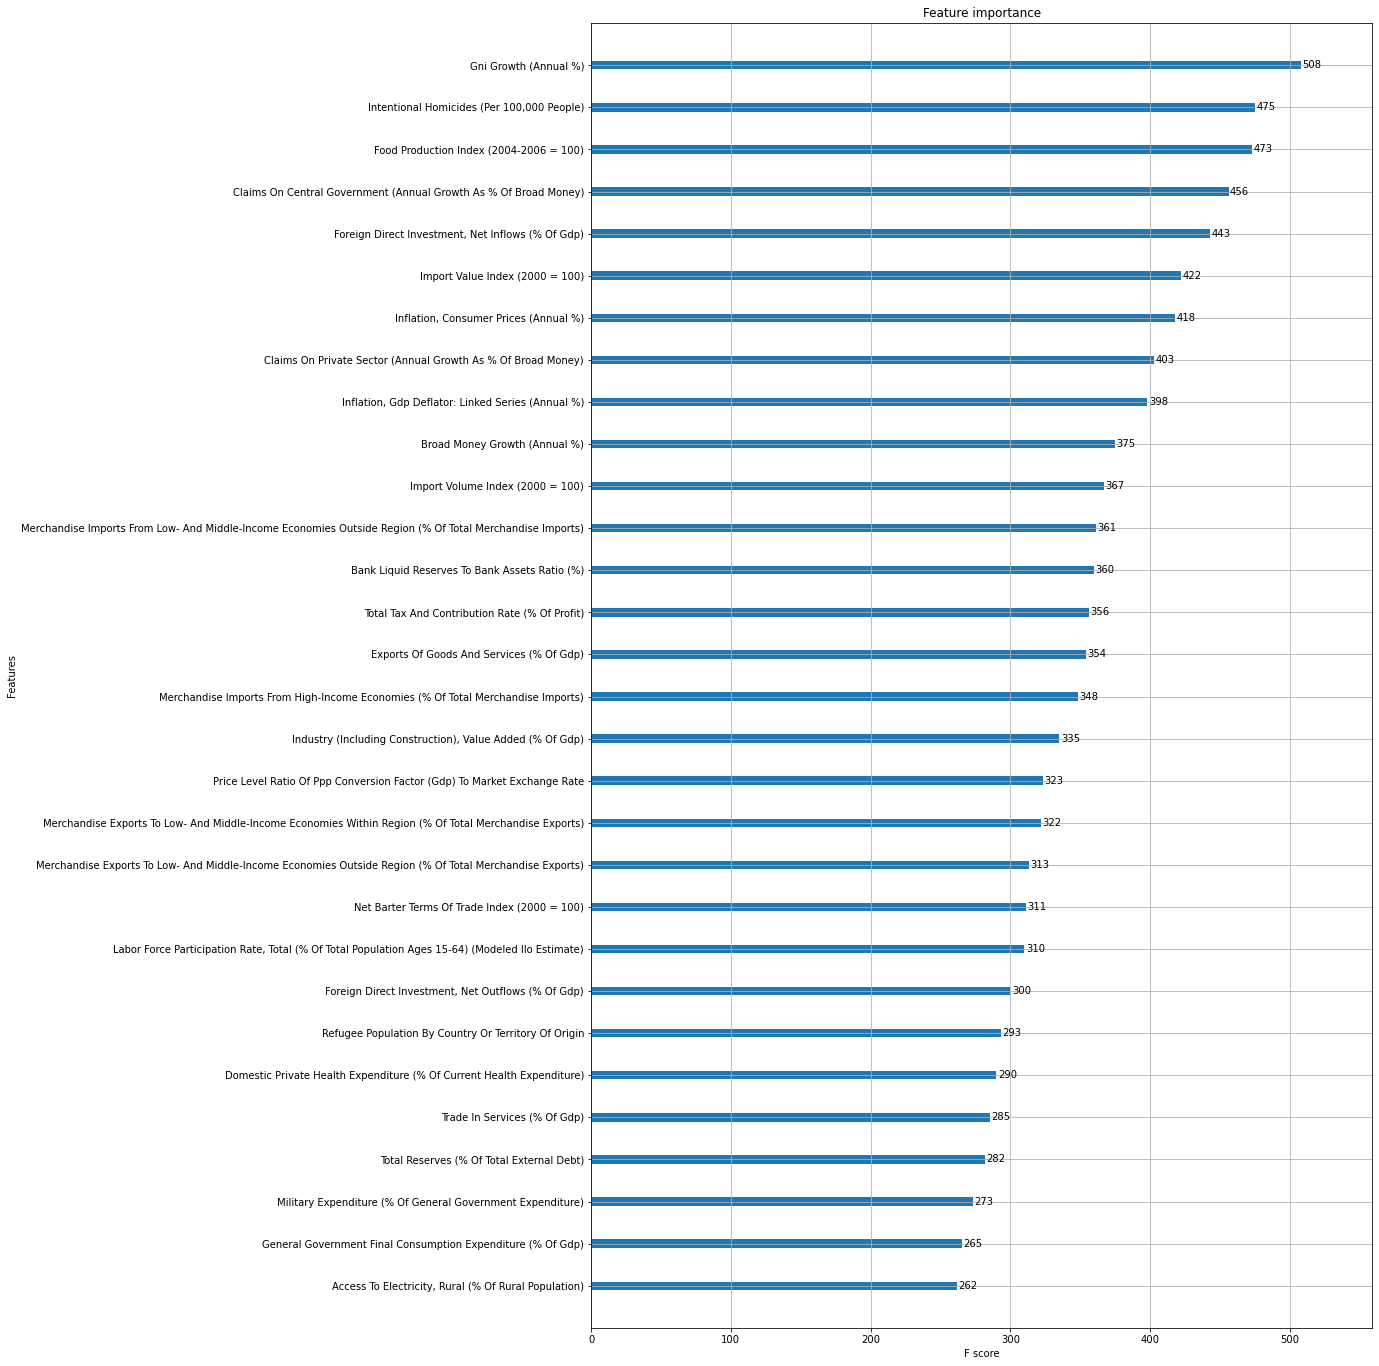

In [40]:
plot_importance(model,max_num_features=30)

In [49]:
important_features = pd.Series(data=model.feature_importances_,index=X_train.columns)
important_features.sort_values(ascending=False,inplace=True)

In [54]:
important_features.sort_values(ascending=False).nlargest(20)

Refugee Population By Country Or Territory Of Origin                                                       0.030973
Agricultural Land (% Of Land Area)                                                                         0.029617
Public Credit Registry Coverage (% Of Adults)                                                              0.029306
Merchandise Exports To High-Income Economies (% Of Total Merchandise Exports)                              0.025644
Lifetime Risk Of Maternal Death (%)                                                                        0.024074
region_USAID_Latin America and Caribbean (LAC)                                                             0.023141
Gdp Per Person Employed (Constant 2017 Ppp $)                                                              0.022766
Domestic Credit To Private Sector (% Of Gdp)                                                               0.022565
Total Reserves (% Of Total External Debt)                               

In [91]:
fscore=model.get_booster().get_score()
fscore

{'Merchandise Exports To High-Income Economies (% Of Total Merchandise Exports)': 260,
 'Merchandise Imports From Low- And Middle-Income Economies Outside Region (% Of Total Merchandise Imports)': 361,
 'Merchandise Imports From High-Income Economies (% Of Total Merchandise Imports)': 348,
 'Inflation, Consumer Prices (Annual %)': 418,
 'Gross Savings (% Of Gdp)': 247,
 'Refugee Population By Country Or Territory Of Origin': 293,
 'Prevalence Of Undernourishment (% Of Population)': 224,
 'Inflation, Gdp Deflator: Linked Series (Annual %)': 398,
 'Domestic Private Health Expenditure (% Of Current Health Expenditure)': 290,
 'Population Growth (Annual %)': 187,
 'Total Reserves (% Of Total External Debt)': 282,
 'Foreign Direct Investment, Net Inflows (% Of Gdp)': 443,
 'Industry (Including Construction), Value Added (% Of Gdp)': 335,
 'Merchandise Exports To Low- And Middle-Income Economies Outside Region (% Of Total Merchandise Exports)': 313,
 'Claims On Central Government (Annual Gro

In [100]:
df1 = pd.DataFrame(list(fscore.items()),columns = ['Indicators','F-score'])

In [105]:
df2=df.sort_values(by='F-score', ascending=False).nlargest(30, 'F-score')
df2

,Indicators,F-score
45,Gni Growth (Annual %),508
37,"Intentional Homicides (Per 100,000 People)",475
15,Food Production Index (2004-2006 = 100),473
14,Claims On Central Government (Annual Growth As...,456
11,"Foreign Direct Investment, Net Inflows (% Of Gdp)",443
54,Import Value Index (2000 = 100),422
3,"Inflation, Consumer Prices (Annual %)",418
20,Claims On Private Sector (Annual Growth As % O...,403
7,"Inflation, Gdp Deflator: Linked Series (Annual %)",398
58,Broad Money Growth (Annual %),375


In [109]:
cd /Users/yanglingxi/Desktop

/Users/yanglingxi/Desktop


In [110]:
df2.to_csv("index.csv")

In [114]:
df = pd.read_csv('/Users/yanglingxi/Documents/GitHub/Anti-Corruption2/final.csv')
df3 = df.dropna()
df3

,Unnamed: 0,Unnamed: 0.1,Index,Country Code,Year,Country Name,Corruption Perception Index,IncomeGroup,region_USAID,region_WorldBank,...,Population Ages 0-14 (% Of Total Population),Access To Clean Fuels And Technologies For Cooking (% Of Population),"People Using At Least Basic Drinking Water Services, Rural (% Of Rural Population)","People Using At Least Basic Sanitation Services, Rural (% Of Rural Population)","Labor Force Participation Rate, Total (% Of Total Population Ages 15-64) (Modeled Ilo Estimate)","Unemployment, Total (% Of Total Labor Force) (Modeled Ilo Estimate)",Gdp Per Person Employed (Constant 2017 Ppp $),"Wage And Salaried Workers, Total (% Of Total Employment) (Modeled Ilo Estimate)",Import Volume Index (2000 = 100),Trade (% Of Gdp)
56,56,56,196,AFG,2007,Afghanistan,18.0,Low income,South and Central Asia (SCA),South Asia,...,48.126233,15.99000,33.732741,27.476086,49.344002,11.046,7056.174167,8.852000,187.697479,55.393618
57,57,57,197,AFG,2007,Afghanistan,18.0,Low income,South and Central Asia (SCA),South Asia,...,48.126233,15.99000,33.732741,27.476086,49.344002,11.046,7056.174167,8.852000,187.697479,55.393618
58,58,58,198,AFG,2007,Afghanistan,18.0,Low income,South and Central Asia (SCA),South Asia,...,48.126233,15.99000,33.732741,27.476086,49.344002,11.046,7056.174167,8.852000,187.697479,55.393618
59,59,59,199,AFG,2007,Afghanistan,18.0,Low income,South and Central Asia (SCA),South Asia,...,48.126233,15.99000,33.732741,27.476086,49.344002,11.046,7056.174167,8.852000,187.697479,55.393618
60,60,60,200,AFG,2007,Afghanistan,18.0,Low income,South and Central Asia (SCA),South Asia,...,48.126233,15.99000,33.732741,27.476086,49.344002,11.046,7056.174167,8.852000,187.697479,55.393618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,4019,4019,5359,ZMB,2017,Zambia,37.0,Lower middle income,Sub-Saharan Africa (SSA),Sub-Saharan Africa,...,45.411369,16.75112,41.952058,18.932012,75.505997,11.626,9648.782217,21.349001,567.892902,71.585759
4020,4020,4020,5360,ZMB,2018,Zambia,35.0,Lower middle income,Sub-Saharan Africa (SSA),Sub-Saharan Africa,...,44.936141,16.58418,44.134510,18.919180,75.313004,11.500,9676.891123,21.507000,626.417589,72.966216
4021,4021,4021,5361,ZMB,2018,Zambia,35.0,Lower middle income,Sub-Saharan Africa (SSA),Sub-Saharan Africa,...,44.936141,16.58418,44.134510,18.919180,75.313004,11.500,9676.891123,21.507000,626.417589,72.966216
4022,4022,4022,5362,ZMB,2019,Zambia,34.0,Lower middle income,Sub-Saharan Africa (SSA),Sub-Saharan Africa,...,44.462509,17.74318,45.556623,18.179606,75.259003,11.425,9479.540064,21.563000,344.359603,70.035035


In [116]:
df4=df3[['Index','Country Code','Country Name','Year','IncomeGroup','Corruption Perception Index',
    "Gni Growth (Annual %)",
"Intentional Homicides (Per 100,000 People)",
"Food Production Index (2004-2006 = 100)",
"Claims On Central Government (Annual Growth As % Of Broad Money)",
"Foreign Direct Investment, Net Inflows (% Of Gdp)",
"Import Value Index (2000 = 100)",
"Inflation, Consumer Prices (Annual %)",
"Claims On Private Sector (Annual Growth As % Of Broad Money)",
"Inflation, Gdp Deflator: Linked Series (Annual %)",
"Broad Money Growth (Annual %)",
"Import Volume Index (2000 = 100)",
"Merchandise Imports From Low- And Middle-Income Economies Outside Region (% Of Total Merchandise Imports)",
"Bank Liquid Reserves To Bank Assets Ratio (%)",
"Total Tax And Contribution Rate (% Of Profit)",
"Exports Of Goods And Services (% Of Gdp)",
"Merchandise Imports From High-Income Economies (% Of Total Merchandise Imports)",
"Industry (Including Construction), Value Added (% Of Gdp)",
"Price Level Ratio Of Ppp Conversion Factor (Gdp) To Market Exchange Rate",
"Merchandise Exports To Low- And Middle-Income Economies Within Region (% Of Total Merchandise Exports)",
"Merchandise Exports To Low- And Middle-Income Economies Outside Region (% Of Total Merchandise Exports)",
"Net Barter Terms Of Trade Index (2000 = 100)",
"Labor Force Participation Rate, Total (% Of Total Population Ages 15-64) (Modeled Ilo Estimate)",
"Foreign Direct Investment, Net Outflows (% Of Gdp)",
"Refugee Population By Country Or Territory Of Origin",
"Domestic Private Health Expenditure (% Of Current Health Expenditure)",
"Trade In Services (% Of Gdp)",
"Total Reserves (% Of Total External Debt)",
"Military Expenditure (% Of General Government Expenditure)",
"General Government Final Consumption Expenditure (% Of Gdp)",
"Access To Electricity, Rural (% Of Rural Population)"]]
df4

,Index,Country Code,Country Name,Year,IncomeGroup,Corruption Perception Index,Gni Growth (Annual %),"Intentional Homicides (Per 100,000 People)",Food Production Index (2004-2006 = 100),Claims On Central Government (Annual Growth As % Of Broad Money),...,Net Barter Terms Of Trade Index (2000 = 100),"Labor Force Participation Rate, Total (% Of Total Population Ages 15-64) (Modeled Ilo Estimate)","Foreign Direct Investment, Net Outflows (% Of Gdp)",Refugee Population By Country Or Territory Of Origin,Domestic Private Health Expenditure (% Of Current Health Expenditure),Trade In Services (% Of Gdp),Total Reserves (% Of Total External Debt),Military Expenditure (% Of General Government Expenditure),General Government Final Consumption Expenditure (% Of Gdp),"Access To Electricity, Rural (% Of Rural Population)"
56,196,AFG,Afghanistan,2007,Low income,18.0,5.786177,4.906175,108.92000,6.649365,...,127.525841,49.344002,-0.025545,3057655.0,78.169991,20.718668,160.765930,11.948405,11.042006,19.868266
57,197,AFG,Afghanistan,2007,Low income,18.0,5.786177,4.906175,108.92000,6.649365,...,127.525841,49.344002,-0.025545,3057655.0,78.169991,20.718668,160.765930,11.948405,11.042006,19.868266
58,198,AFG,Afghanistan,2007,Low income,18.0,5.786177,4.906175,108.92000,6.649365,...,127.525841,49.344002,-0.025545,3057655.0,78.169991,20.718668,160.765930,11.948405,11.042006,19.868266
59,199,AFG,Afghanistan,2007,Low income,18.0,5.786177,4.906175,108.92000,6.649365,...,127.525841,49.344002,-0.025545,3057655.0,78.169991,20.718668,160.765930,11.948405,11.042006,19.868266
60,200,AFG,Afghanistan,2007,Low income,18.0,5.786177,4.906175,108.92000,6.649365,...,127.525841,49.344002,-0.025545,3057655.0,78.169991,20.718668,160.765930,11.948405,11.042006,19.868266
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,5359,ZMB,Zambia,2017,Lower middle income,37.0,3.526700,5.629774,171.55394,24.028184,...,183.300556,75.505997,-0.278520,260.0,18.788671,9.042752,11.883818,5.166691,13.720808,13.997699
4020,5360,ZMB,Zambia,2018,Lower middle income,35.0,5.904849,5.580519,156.42136,6.809052,...,174.734722,75.313004,0.167830,266.0,22.866344,9.741563,8.208970,5.656476,12.382458,10.968000
4021,5361,ZMB,Zambia,2018,Lower middle income,35.0,5.904849,5.580519,156.42136,6.809052,...,174.734722,75.313004,0.167830,266.0,22.866344,9.741563,8.208970,5.656476,12.382458,10.968000
4022,5362,ZMB,Zambia,2019,Lower middle income,34.0,5.985524,5.423583,153.82510,8.671762,...,168.092855,75.259003,3.060885,261.0,25.362109,11.045067,20.817610,5.720566,14.251248,13.775150


In [119]:
df4.reset_index(drop=True, inplace=True)
df4

,Index,Country Code,Country Name,Year,IncomeGroup,Corruption Perception Index,Gni Growth (Annual %),"Intentional Homicides (Per 100,000 People)",Food Production Index (2004-2006 = 100),Claims On Central Government (Annual Growth As % Of Broad Money),...,Net Barter Terms Of Trade Index (2000 = 100),"Labor Force Participation Rate, Total (% Of Total Population Ages 15-64) (Modeled Ilo Estimate)","Foreign Direct Investment, Net Outflows (% Of Gdp)",Refugee Population By Country Or Territory Of Origin,Domestic Private Health Expenditure (% Of Current Health Expenditure),Trade In Services (% Of Gdp),Total Reserves (% Of Total External Debt),Military Expenditure (% Of General Government Expenditure),General Government Final Consumption Expenditure (% Of Gdp),"Access To Electricity, Rural (% Of Rural Population)"
0,196,AFG,Afghanistan,2007,Low income,18.0,5.786177,4.906175,108.92000,6.649365,...,127.525841,49.344002,-0.025545,3057655.0,78.169991,20.718668,160.765930,11.948405,11.042006,19.868266
1,197,AFG,Afghanistan,2007,Low income,18.0,5.786177,4.906175,108.92000,6.649365,...,127.525841,49.344002,-0.025545,3057655.0,78.169991,20.718668,160.765930,11.948405,11.042006,19.868266
2,198,AFG,Afghanistan,2007,Low income,18.0,5.786177,4.906175,108.92000,6.649365,...,127.525841,49.344002,-0.025545,3057655.0,78.169991,20.718668,160.765930,11.948405,11.042006,19.868266
3,199,AFG,Afghanistan,2007,Low income,18.0,5.786177,4.906175,108.92000,6.649365,...,127.525841,49.344002,-0.025545,3057655.0,78.169991,20.718668,160.765930,11.948405,11.042006,19.868266
4,200,AFG,Afghanistan,2007,Low income,18.0,5.786177,4.906175,108.92000,6.649365,...,127.525841,49.344002,-0.025545,3057655.0,78.169991,20.718668,160.765930,11.948405,11.042006,19.868266
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3243,5359,ZMB,Zambia,2017,Lower middle income,37.0,3.526700,5.629774,171.55394,24.028184,...,183.300556,75.505997,-0.278520,260.0,18.788671,9.042752,11.883818,5.166691,13.720808,13.997699
3244,5360,ZMB,Zambia,2018,Lower middle income,35.0,5.904849,5.580519,156.42136,6.809052,...,174.734722,75.313004,0.167830,266.0,22.866344,9.741563,8.208970,5.656476,12.382458,10.968000
3245,5361,ZMB,Zambia,2018,Lower middle income,35.0,5.904849,5.580519,156.42136,6.809052,...,174.734722,75.313004,0.167830,266.0,22.866344,9.741563,8.208970,5.656476,12.382458,10.968000
3246,5362,ZMB,Zambia,2019,Lower middle income,34.0,5.985524,5.423583,153.82510,8.671762,...,168.092855,75.259003,3.060885,261.0,25.362109,11.045067,20.817610,5.720566,14.251248,13.775150


In [120]:
df4.to_csv("selected_indicators.csv")